[![ebac_logo-data_science.png](https://raw.githubusercontent.com/diegobezzi/DataScience_Estudos/main/ebac-course-utils/media/logo/ebac_logo-data_science.png)](https://github.com//diegobezzi/DataScience_Estudos)
<!-- <img src="https://raw.githubusercontent.com/diegobezzi/DataScience_Estudos/main/ebac-course-utils/media/logo/ebac_logo-data_science.png" alt="ebac_logo-data_science"> -->

---

<!-- # **Profissão: Cientista de Dados** -->
### **Módulo 22** | Descritiva III - Gráficos interativos | Exercício 1

**Aluno:** [Diego Perez Bezzi Vilas Boas](https://www.linkedin.com/in/diegobezzi/)<br>
**Data:** 05 de junho de 2024.

---

# Tarefa 01

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

In [1]:
from pandas_datareader import data as web
import datetime as dt
import yfinance as yfin

import plotly.express as px
from plotly import graph_objects

import pandas as pd
import numpy as np

from pandas_datareader import data as pdr

yfin.pdr_override()

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


#### 1. Baixando dados de ativos
    1. Baixe os dados de três ativos da sua escolha do Yahoo Finance, correspondente a um período de pelo menos 2 anos até a data mais recente.
    

In [2]:
%%time
ativos = ['ITUB3.SA', 'PETR4.SA', 'VALE3.SA']
dt_ini = '2022-01-01'
dt_fim = '2024-06-01'

yf = yfin.download(ativos, dt_ini,dt_fim)

yf.head()

[*********************100%%**********************]  3 of 3 completed

CPU times: total: 438 ms
Wall time: 1.69 s


Price       Adj Close                            Close                        \
Ticker       ITUB3.SA   PETR4.SA   VALE3.SA   ITUB3.SA   PETR4.SA   VALE3.SA   
Date                                                                           
2022-01-03  16.704260  13.104607  64.069557  19.379999  29.090000  78.000000   
2022-01-04  17.074890  13.154160  63.313854  19.809999  29.200001  77.080002   
2022-01-05  16.730116  12.645111  63.913479  19.410000  28.070000  77.809998   
2022-01-06  17.031799  12.636098  65.203087  19.760000  28.049999  79.379997   
2022-01-07  17.298996  12.694662  68.997971  20.070000  28.180000  84.000000   

Price            High                              Low                        \
Ticker       ITUB3.SA   PETR4.SA   VALE3.SA   ITUB3.SA   PETR4.SA   VALE3.SA   
Date                                                                           
2022-01-03  19.680000  29.219999  79.970001  19.040001  28.530001  78.000000   
2022-01-04  19.850000  29.400000  79.070000  19.350000  28.910000  76.900002   
2022-01-05  19.910000  29.270000  78.680000  19.379999  27.940001  77.129997   
2022-01-06  19.799999  28.650000  80.349998  19.350000  27.840000  78.309998   
2022-01-07  20.100000  28.290001  84.000000  19.459999  27.820000  79.790001   

Price            Open                         Volume                      
Ticker       ITUB3.SA   PETR4.SA   VALE3.SA ITUB3.SA  PETR4.SA  VALE3.SA  
Date                                                                      
2022-01-03  19.290001  28.540001  79.000000  1289800  52704700  18557200  
2022-01-04  19.350000  29.160000  78.510002   984800  51739200  18178700  
2022-01-05  19.780001  29.190001  77.370003   868800  78459800  22039000  
2022-01-06  19.709999  28.290001  78.639999  1865700  61163100  22044100  
2022-01-07  19.840000  28.110001  80.400002   985600  47507600  35213100

2. Salve esses dados para que você possa utilizá-los na próxima tarefa.

In [14]:
yf.to_csv(path_or_buf='ativos_bovespa.csv')

df = pd.read_csv(filepath_or_buffer='ativos_bovespa.csv', 
                 header=[0,1], 
                 index_col=0)
df.head()

Price       Adj Close                            Close                        \
Ticker       ITUB3.SA   PETR4.SA   VALE3.SA   ITUB3.SA   PETR4.SA   VALE3.SA   
Date                                                                           
2022-01-03  16.704260  13.104607  64.069557  19.379999  29.090000  78.000000   
2022-01-04  17.074890  13.154160  63.313854  19.809999  29.200001  77.080002   
2022-01-05  16.730116  12.645111  63.913479  19.410000  28.070000  77.809998   
2022-01-06  17.031799  12.636098  65.203087  19.760000  28.049999  79.379997   
2022-01-07  17.298996  12.694662  68.997971  20.070000  28.180000  84.000000   

Price            High                              Low                        \
Ticker       ITUB3.SA   PETR4.SA   VALE3.SA   ITUB3.SA   PETR4.SA   VALE3.SA   
Date                                                                           
2022-01-03  19.680000  29.219999  79.970001  19.040001  28.530001  78.000000   
2022-01-04  19.850000  29.400000  79.070000  19.350000  28.910000  76.900002   
2022-01-05  19.910000  29.270000  78.680000  19.379999  27.940001  77.129997   
2022-01-06  19.799999  28.650000  80.349998  19.350000  27.840000  78.309998   
2022-01-07  20.100000  28.290001  84.000000  19.459999  27.820000  79.790001   

Price            Open                         Volume                      
Ticker       ITUB3.SA   PETR4.SA   VALE3.SA ITUB3.SA  PETR4.SA  VALE3.SA  
Date                                                                      
2022-01-03  19.290001  28.540001  79.000000  1289800  52704700  18557200  
2022-01-04  19.350000  29.160000  78.510002   984800  51739200  18178700  
2022-01-05  19.780001  29.190001  77.370003   868800  78459800  22039000  
2022-01-06  19.709999  28.290001  78.639999  1865700  61163100  22044100  
2022-01-07  19.840000  28.110001  80.400002   985600  47507600  35213100

#### 2. Observando a volatilidade dentro do dia
1. Calcule a amplitude de variação do valor do ativo dentro do dia. Essa amplitude você pode calcular com um comando simples de adicionar uma coluna no Pandas: (valor máximo - valor mínimo).

In [15]:
df = df.stack()
df

Price                Adj Close      Close       High        Low       Open  \
Date       Ticker                                                            
2022-01-03 ITUB3.SA  16.704260  19.379999  19.680000  19.040001  19.290001   
           PETR4.SA  13.104607  29.090000  29.219999  28.530001  28.540001   
           VALE3.SA  64.069557  78.000000  79.970001  78.000000  79.000000   
2022-01-04 ITUB3.SA  17.074890  19.809999  19.850000  19.350000  19.350000   
           PETR4.SA  13.154160  29.200001  29.400000  28.910000  29.160000   
...                        ...        ...        ...        ...        ...   
2024-05-29 PETR4.SA  37.750000  37.750000  37.919998  37.439999  37.709999   
           VALE3.SA  63.240002  63.240002  63.730000  62.970001  63.439999   
2024-05-31 ITUB3.SA  26.932350  26.950001  27.340000  26.889999  27.219999   
           PETR4.SA  38.790001  38.790001  38.889999  37.900002  37.930000   
           VALE3.SA  63.200001  63.200001  63.450001  62.790001  62.889999   

Price                  Volume  
Date       Ticker              
2022-01-03 ITUB3.SA   1289800  
           PETR4.SA  52704700  
           VALE3.SA  18557200  
2022-01-04 ITUB3.SA    984800  
           PETR4.SA  51739200  
...                       ...  
2024-05-29 PETR4.SA  29246800  
           VALE3.SA  16496900  
2024-05-31 ITUB3.SA    361000  
           PETR4.SA  53929400  
           VALE3.SA  23383600  

[1806 rows x 6 columns]

In [19]:
df_high = df['High']
df_high = df_high.stack().reset_index()
df_high.columns = ['data', 'ativo', 'high']
df_high

,data,ativo,high
0,2022-01-03,ITUB3.SA,19.680000
1,2022-01-03,PETR4.SA,29.219999
2,2022-01-03,VALE3.SA,79.970001
3,2022-01-04,ITUB3.SA,19.850000
4,2022-01-04,PETR4.SA,29.400000
...,...,...,...
1801,2024-05-29,PETR4.SA,37.919998
1802,2024-05-29,VALE3.SA,63.730000
1803,2024-05-31,ITUB3.SA,27.340000
1804,2024-05-31,PETR4.SA,38.889999


In [21]:
df_low = df['Low']
df_low = df_low.stack().reset_index()
df_low.columns = ['data', 'ativo', 'low']
df_low

,data,ativo,low
0,2022-01-03,ITUB3.SA,19.040001
1,2022-01-03,PETR4.SA,28.530001
2,2022-01-03,VALE3.SA,78.000000
3,2022-01-04,ITUB3.SA,19.350000
4,2022-01-04,PETR4.SA,28.910000
...,...,...,...
1801,2024-05-29,PETR4.SA,37.439999
1802,2024-05-29,VALE3.SA,62.970001
1803,2024-05-31,ITUB3.SA,26.889999
1804,2024-05-31,PETR4.SA,37.900002


In [22]:
df_ampli = df_high

In [23]:
df_ampli['low'] = df_low['low']
df_ampli['amplitude'] = df_ampli['high'] - df_ampli['low']
df_ampli

,data,ativo,high,low,amplitude
0,2022-01-03,ITUB3.SA,19.680000,19.040001,0.639999
1,2022-01-03,PETR4.SA,29.219999,28.530001,0.689999
2,2022-01-03,VALE3.SA,79.970001,78.000000,1.970001
3,2022-01-04,ITUB3.SA,19.850000,19.350000,0.500000
4,2022-01-04,PETR4.SA,29.400000,28.910000,0.490000
...,...,...,...,...,...
1801,2024-05-29,PETR4.SA,37.919998,37.439999,0.480000
1802,2024-05-29,VALE3.SA,63.730000,62.970001,0.759998
1803,2024-05-31,ITUB3.SA,27.340000,26.889999,0.450001
1804,2024-05-31,PETR4.SA,38.889999,37.900002,0.989998


2. Monte um gráfico de linha mostrando a variação dessa amplitude ao longo do período coletado, por ativo.

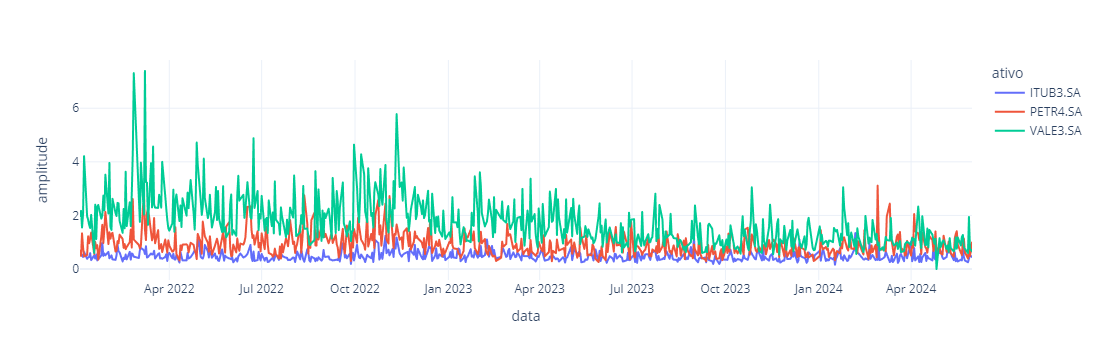

In [24]:
fig = px.line(data_frame=df_ampli, 
              x='data', 
              y='amplitude', 
              color='ativo', 
              template='plotly_white')
fig.show()

3. Veja se consegue identificar que ativo apresentou maior volatilidade.

>Entre os ativos selecionados para esta atividade, podemos observar claramente que a Vale (**VALE3.SA**) apresentou a maior volatilidade durante o período de análise desde o ano de 2022.